In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [4]:
array, tickers, dates = stockData.get_N_stocks(30)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (11652, 30)
Number of stocks observed is: 30
Number of observations is: 11652
[[  5.41476011  27.           5.07168293   0.74485594   4.72916651
   12.64500046   3.6875       1.90304482  20.125        5.09722233
    6.0625       9.125        1.43229163  15.125        5.09783745
    0.48428985  19.95000076   9.64620304   2.48958325   1.38411462
    1.43981481   9.5859375    1.04557288   2.03819442   4.9915452
  322.5          0.84635419   3.078125     1.24609375   2.34765625]
 [  5.41476011  27.125        5.07168293   0.73662549   4.70833349
   12.64500046   3.6953125    1.89662433  20.125        5.125
    6.0625       9.09375      1.4453125   15.           5.16000605
    0.4940466   19.95000076   9.55374718   2.52604175   1.375
    1.40432096   9.609375     1.04427087   2.02777767   5.0122571
  328.75         0.859375     3.0625       1.234375     2.3203125 ]
 [  5.24655008  27.125        4.93112803   0.72839504   4.70833349
   12.64500046   3.6875       1

In [5]:
from inference.sample import StockSampler

sampler = StockSampler(array, tickers, dates, m=6)

In [6]:
sampler.x

array([[  5.41476011,  27.        ,   5.07168293, ...,   3.078125  ,
          1.24609375,   2.34765625],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 42.70999908,  71.27999878,  21.29999924, ...,  83.22000122,
        132.61000061,  79.51999664]])

In [7]:
sampler.sample(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:44<00:00,  3.44s/it]


In [8]:
sampler.b2

array([[0.22845269, 0.14505469, 0.11732811, ..., 0.76697471, 0.4127445 ,
        0.30880971],
       [0.20555489, 0.28414024, 0.09065451, ..., 0.83729269, 0.02726759,
        0.07589984],
       [0.2070803 , 0.33161838, 0.07621884, ..., 0.73567609, 0.03447714,
        0.07812161],
       ...,
       [0.17542165, 0.22698954, 0.11355948, ..., 0.94688775, 0.01552684,
        0.12545645],
       [0.14792928, 0.29628044, 0.08493478, ..., 0.85559404, 0.06195572,
        0.08845272],
       [0.06907713, 0.35989221, 0.29436705, ..., 0.9299093 , 0.0910574 ,
        0.0576105 ]])

In [9]:
np.min(sampler.x)

0.35954964160919206

In [10]:
np.max(sampler.x)

1417.356669532011

In [11]:
mu_ijk = sampler.x/np.roll(sampler.x, 1, axis=1)

In [12]:
mu_ijk.shape

(69907, 30)

In [13]:
sampler.x.shape

(69907, 30)

In [14]:
np.min(mu_ijk)

0.001262130049007082

In [15]:
np.max(mu_ijk)

106.17338071808166

In [16]:
np.min(sampler.etas)

0.30805044126882253

In [17]:
np.max(sampler.etas[0])

452.5

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

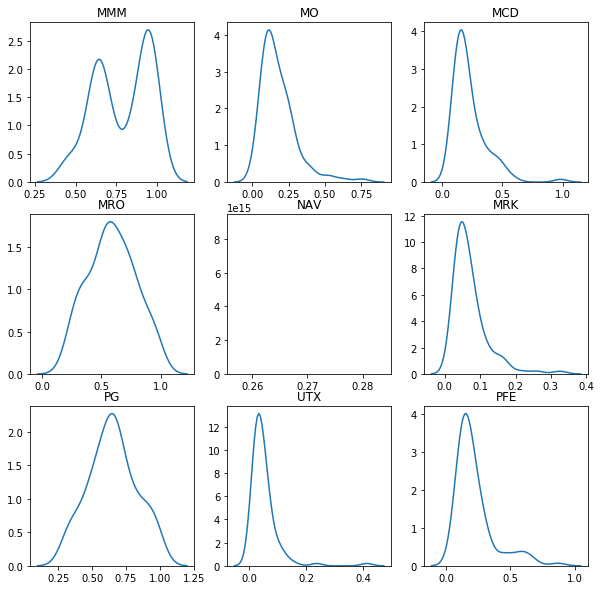

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))
N0 = 20
for i in range(N0, N0+9):
    sns.kdeplot(sampler.b2[:,i], ax=axes[(i-N0)//3, i%3]).set_title(sampler.tickers[i])

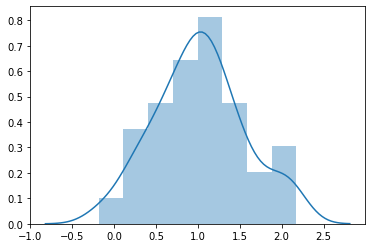

In [22]:
sns.distplot(sampler.theta)

In [23]:
sampler.b2[1]

array([0.20555489, 0.28414024, 0.09065451, 0.34443075, 0.30919486,
       0.07449991, 0.20646711, 0.09354705, 0.39623294, 0.02541683,
       0.10999526, 0.08753935, 0.4547696 , 0.40294971, 0.74672568,
       0.09831613, 0.15365146, 0.05729937, 0.26339152, 0.2321492 ,
       0.1257923 , 0.46664238, 0.05413538, 0.05509322, 0.37212336,
       0.27033218, 0.14912723, 0.83729269, 0.02726759, 0.07589984])

In [24]:
np.mean(sampler.etas[3])

56.90718396063693

In [25]:
sampler.prices_array

array([[  5.41476011,  27.        ,   5.07168293, ...,   3.078125  ,
          1.24609375,   2.34765625],
       [  5.41476011,  27.125     ,   5.07168293, ...,   3.0625    ,
          1.234375  ,   2.3203125 ],
       [  5.24655008,  27.125     ,   4.93112803, ...,   3.0546875 ,
          1.24609375,   2.30859375],
       ...,
       [ 43.20000076,  71.80000305,  21.57999992, ...,  83.80999756,
        135.05999756,  79.11000061],
       [ 42.5       ,  70.69999695,  21.43000031, ...,  83.01000214,
        133.50999451,  79.55999756],
       [ 42.70999908,  71.27999878,  21.29999924, ...,  83.22000122,
        132.61000061,  79.51999664]])

In [26]:
sampler.etas[0][6]

array([  5.41476011,  27.125     ,   5.07168293,   0.73662549,
         4.70833349,  12.64500046,   3.6953125 ,   1.89662433,
        20.125     ,   5.125     ,   6.0625    ,   9.09375   ,
         1.4453125 ,  15.        ,   5.16000605,   0.4940466 ,
        19.95000076,   9.55374718,   2.52604175,   1.375     ,
         1.40432096,   9.609375  ,   1.04427087,   2.02777767,
         5.0122571 , 328.75      ,   0.859375  ,   3.0625    ,
         1.234375  ,   2.3203125 ])

In [27]:
sampler.Rs[1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])